---
# Count triplet frequencies in Human genome HG38 --> adjusted for 5-mers 
---

- To estimate the relative mutation rate of each 5mer 
  we need to know how many of each 5mers exist in the 
  human genome
  
- We simply walk through the genome counting each unique
  triplet.
  
- 5-mer will include those with N's and lower case letters

- We ignore those with N's and convert the lower case to upper



In [17]:
import json
from Bio import SeqIO
import gzip 
from collections import defaultdict
from tqdm import tqdm 
import matplotlib.pyplot as plt

In [3]:
fiveMers = defaultdict(int)

ref = gzip.open("/research/references/hsapiens/hg38/hg38.fa.gz", 'rt')

for s in tqdm(SeqIO.parse(ref, 'fasta')):
    for i in range(len(s.seq)-5):
        fiveMer = str(s.seq[i:i+5])
        fiveMers[fiveMer]+=1
            
    

455it [1:15:43,  9.99s/it]


In [9]:
from itertools import product

# this deals with ignoring triplets with Ns and uppercases all the triplets with lower case ba
fiveMer_data = dict(zip(["".join(t) for t in product("ACGT", repeat=5) ], [0]*1024))
for fiveMer, f_count in fiveMers.items():
    if fiveMer.upper() in fiveMer_data:
        fiveMer_data[fiveMer.upper()] += f_count

# fiveMers_list = list(fiveMer_data.keys())
# fiveMers_list.sort()
# for t in fiveMers_list:
#     print(t,":\t", fiveMer_data[t])
        

In [15]:
text_file = open("global_fivemer_counts_2021_08_31.txt", "w")
n = text_file.write(json.dumps(fiveMer_data))
text_file.close()

In [18]:
plotting = []
for fivmerval in fiveMer_data.values(): 
    plotting.append(fivmerval)

(array([318., 479., 180.,  29.,  14.,   2.,   0.,   0.,   0.,   2.]),
 array([   84614. ,  2113693.8,  4142773.6,  6171853.4,  8200933.2,
        10230013. , 12259092.8, 14288172.6, 16317252.4, 18346332.2,
        20375412. ]),
 <BarContainer object of 10 artists>)

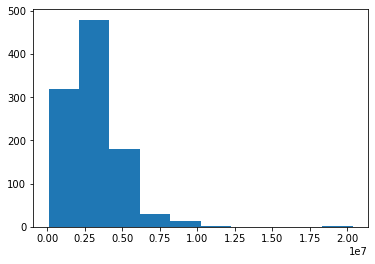

In [19]:
plt.hist(plotting)

# **double checking agaisnt triplet counts** 

In [21]:
triplet_counts = json.load(open("GenomeTripletCounts_2020_12_02_genomeWide.txt"))

**printing the relative discrepancy between the count of the triplet and the fivemer count**

In [25]:
for triplet,trip_val in triplet_counts.items(): 
    cur_trip_fivmer_count = 0
    for fivemer,fivemerVal in fiveMer_data.items(): 
        if fivemer[1:4]==triplet: 
            cur_trip_fivmer_count+=fivemerVal
    print(triplet, (int(trip_val)-cur_trip_fivmer_count)/int(trip_val))

AGA 2.7802040001898774e-06
CAC 1.1335546700555882e-06
ATG 7.205056854743388e-07
CGC 6.741788164925712e-07
AAG 1.074260913449674e-06
CAT 6.629150809185502e-07
GGT 3.976184359764025e-07
TAG 5.860965662895602e-07
CCC 9.026475555451695e-07
AGC 3.2988836297041026e-06
CAG 5.29503807758155e-07
TAT 4.509704594377519e-07
GCT 8.505358541262967e-07
CCG 9.416721224795263e-07
TGC 8.439767353478966e-07
AGG 6.301679447615538e-07
TTT 5.782818430046436e-07
GAA 3.549023984876513e-06
ATA 8.522006675303908e-07
CGA 1.6064583129179255e-06
AAC 9.322138687721206e-07
GAC 7.613389058265647e-07
GGA 1.2493650102335488e-06
GGG 8.249842015525402e-07
GCG 1.0695430243735486e-06
ACT 8.135137156276981e-07
TGT 9.698572724092919e-07
ATT 2.2732273647250965e-06
TAA 5.142273614176143e-07
CGT 1.622968044008901e-06
TTC 2.310978322187452e-06
GAT 3.24240855859337e-06
ACC 5.680250464964002e-07
GGC 3.1330260398548083e-06
AAT 9.602161894743396e-07
TCT 8.097641776788093e-07
TGG 1.006328677468375e-06
CTC 6.974678816040522e-07
AAA 8.